In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
# read the data
hotels_df = pd.read_csv('data/hotels.csv')

In [4]:
# get the first 5 rows
hotels_df.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [5]:
#  the dimensionality of the Data
hotels_df.shape

(102, 5)

In [6]:
# descriptive statistics
hotels_df[['lat', 'lon']].describe()

,lat,lon
count,102.000000,102.000000
mean,25.069114,121.531683
std,0.032784,0.017703
min,25.017680,121.499170
25%,25.050914,121.523182
50%,25.057260,121.525955
75%,25.067927,121.537565
max,25.139360,121.577890


In [7]:
def cluster_plot(x, y, hue, title):
    fig, ax = plt.subplots(1,1, figsize=(8,6))

    ax = sns.scatterplot(x, y, hue=hue)
       
    ax.set_xlabel('longitude', fontsize=14)
    ax.set_ylabel('latitude', fontsize=14)
    ax.legend(loc='best', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.grid(True, ls='--', alpha=0.5)   

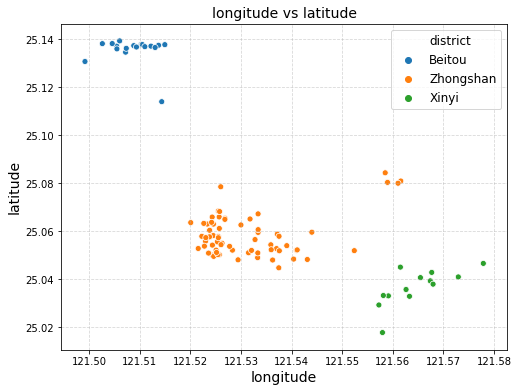

In [8]:
# plot for longitude vs latitude
cluster_plot(hotels_df.lon, hotels_df.lat, hue=hotels_df.district, title='longitude vs latitude')

In [9]:
# encode district label with values 0, 1 and 2
def LabelEncoder(x):
  if x == 'Beitou': return 1
  elif x == 'Zhongshan': return 0
  else: return 2

hotels_df['district_encoded'] = hotels_df['district'].apply(LabelEncoder)

# get first five rows
hotels_df.head()

,address,lat,lon,title,district,district_encoded
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou,1
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan,0
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,1
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi,2
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan,0


### K-Means clustering

In [10]:
k = 3  # number of culsters
# Compute k-means clustering.
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(hotels_df[['lat', 'lon']])
# return the cluster lables and store them in dataframe.
hotels_df['kmeans_cluster'] = kmeans.labels_
# get first five rows 
hotels_df.head()

,address,lat,lon,title,district,district_encoded,kmeans_cluster
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou,1,1
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan,0,0
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,1,1
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi,2,2
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan,0,0


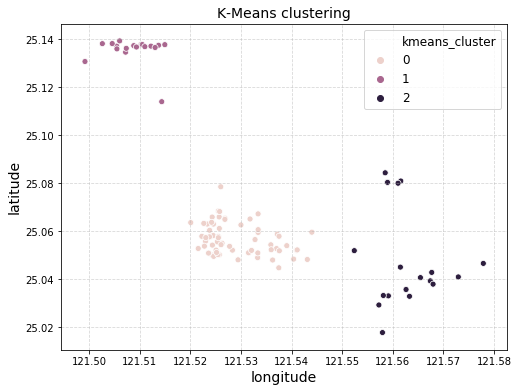

In [11]:
# plots for calculated clusters
cluster_plot(hotels_df.lon, hotels_df.lat, hue=hotels_df.kmeans_cluster, title='K-Means clustering')

In [12]:
print("K-means clustering accuracy score : {:.2f}%".format(accuracy_score(hotels_df.district_encoded, hotels_df.kmeans_cluster)*100))

K-means clustering accuracy score : 94.12%


###  Hierarchical clustering

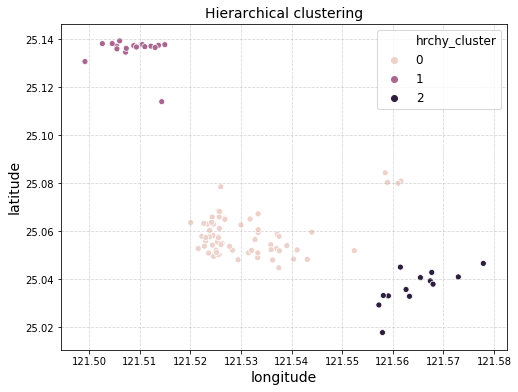

In [13]:
k = 3 # number of clusters
# Fit the hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=k).fit(hotels_df[['lat', 'lon']])
# return the cluster lables and store them in dataframe.
hotels_df['hrchy_cluster'] = clustering.labels_
# plots for calculated clusters
cluster_plot(hotels_df.lon, hotels_df.lat, hue=hotels_df.hrchy_cluster, title='Hierarchical clustering')

In [14]:
print("Hierarchical clustering accuracy score : {:.2f}%".format(accuracy_score
                                                                (hotels_df.district_encoded, hotels_df.hrchy_cluster)*100))

Hierarchical clustering accuracy score : 100.00%
